# Course Project

Author: Olga Chernytska

## Part 1. Preprocessing


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import progressbar

#### Step 0. Load raw data.

In [4]:
df_all_1 = pd.read_csv('./input/busdata_180717-100118.csv', sep=';',
                    header = None, names = ['datetime', 'angle', 'endpoint', 'iterationend', 'iterationstart',
       'routecode', 'routeid', 'routename', 'startpoint', 'state',
       'timetopoint', 'vehicleid', 'vehiclename', 'x', 'y', 'lowfloor'])

In [5]:
df_all_2 = pd.read_csv('./input/busdata_100118-280518.csv', sep=',',
                    header = None, skiprows = 2,
                       names = ['datetime', 'angle', 'endpoint', 'iterationend', 'iterationstart',
       'routecode', 'routeid', 'routename', 'startpoint', 'state',
       'timetopoint', 'vehicleid', 'vehiclename', 'x', 'y', 'lowfloor'])

In [6]:
df_all = df_all_1.append(df_all_2, ignore_index=True)

In [7]:
df_1723724_stops = pd.read_csv('./input/routeid1723724_stops.csv', sep=',')

In [8]:
df_all.groupby(['routename','routeid']).agg({'vehicleid': 'nunique', 'datetime': 'count'})

,,vehicleid,datetime
routename,routeid,,
А13 Суботівська - Червоної Калини,712988.0,35,2524130
А16 Сихівська - Залізничний вокзал,712991.0,33,2926427
А27 Скнилів - Личаківська (АС-6),713002.0,16,1554880
А30 Величковського - Новий Львів,949921.0,12,481470
А30-рем Величковського - Новий Львів,949921.0,6,151616
А35 Трильовського - Польова,713010.0,20,512370
А53 Червоної Калини - Хмельницького,1723724.0,36,3131009
А53-рем Червоної Калини - Хмельницького,1723724.0,32,633762
А54 вул. Антонича - Брюховичі,1527114.0,33,681135


We have chosen route 'А53 Червоної Калини - Хмельницького' (Id: '1723724') as it has the most vehicles and data points.

In [9]:
df = df_all[df_all['routeid'] == 1723724]
df = df[['datetime','vehicleid','state','x','y']]
df['vehicleid'] = df['vehicleid'].astype(int)
df.columns = ['datetime','vehicle_id','state','lon','lat']
df['month'] = df['datetime'].astype(str).str.extract('(\d*-\d*)', expand = False)

In [10]:
df = df.drop_duplicates()

In [11]:
df.isnull().sum(axis = 0)

datetime      0
vehicle_id    0
state         0
lon           0
lat           0
month         0
dtype: int64

In [12]:
print('Result: ')
print(df.shape)
df.head()

Result: 
(3764771, 6)


,datetime,vehicle_id,state,lon,lat,month
29,2017-07-18 19:25:06.428293,38752,2.0,24.051960,49.812255,2017-07
30,2017-07-18 19:25:06.586634,38934,2.0,24.051965,49.812160,2017-07
31,2017-07-18 19:25:06.877954,38936,2.0,24.045143,49.816772,2017-07
32,2017-07-18 19:25:07.050053,38968,2.0,24.051957,49.812038,2017-07
33,2017-07-18 19:25:07.268768,38970,0.0,24.051928,49.811138,2017-07


Check whether actual route correspons to established stops:

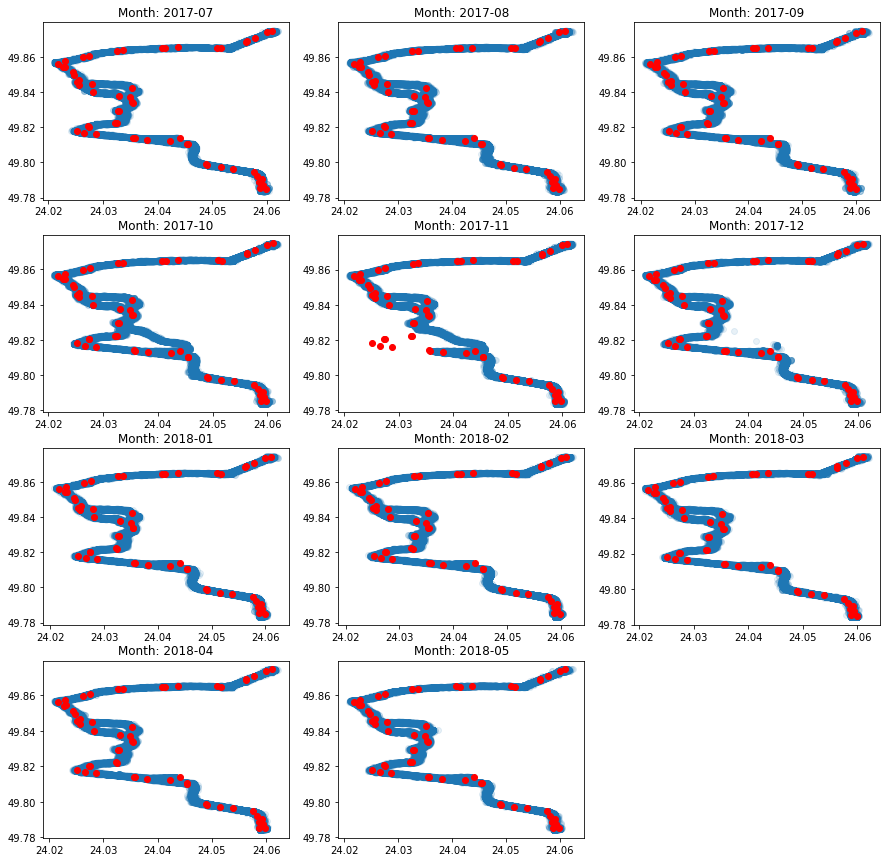

In [13]:
plt.figure(figsize=[15,15])
df_viz = df[df['state']==1]

true_stops_coordinates_dir0 = df_1723724_stops[df_1723724_stops['direction']==0]
true_stops_coordinates_dir1 = df_1723724_stops[df_1723724_stops['direction']==1]

unique_months = np.sort(df['month'].unique())
num_months = len(unique_months)
ncols = 3
nrows = num_months//3 + 1

for i in range(num_months):
    month = unique_months[i]
    plt.subplot(nrows, ncols, i+1)
    df_visualization = df_viz[df_viz['month']== month]
    plt.plot(df_visualization['lon'], df_visualization['lat'], 'o', alpha=0.1)
    plt.plot(true_stops_coordinates_dir0['lon'], true_stops_coordinates_dir0['lat'], 'ro')
    plt.plot(true_stops_coordinates_dir1['lon'], true_stops_coordinates_dir1['lat'], 'ro')
    plt.title('Month: ' + month)

plt.show()

In [14]:
df_viz['month'].value_counts()

2017-08    254609
2017-10    253743
2017-09    245424
2017-11    214951
2018-04    174052
2017-12    172800
2018-01    172396
2018-02    153713
2018-03    153543
2018-05    149591
2017-07    104953
Name: month, dtype: int64

In [15]:
df_step0 = df[df['month'].isin(['2017-07','2017-08','2017-09','2018-01',
                                '2018-02','2018-03','2018-04','2018-05'])]

print('Result: ')
print(df_step0.shape)
df_step0.head()

Result: 
(2595887, 6)


,datetime,vehicle_id,state,lon,lat,month
29,2017-07-18 19:25:06.428293,38752,2.0,24.051960,49.812255,2017-07
30,2017-07-18 19:25:06.586634,38934,2.0,24.051965,49.812160,2017-07
31,2017-07-18 19:25:06.877954,38936,2.0,24.045143,49.816772,2017-07
32,2017-07-18 19:25:07.050053,38968,2.0,24.051957,49.812038,2017-07
33,2017-07-18 19:25:07.268768,38970,0.0,24.051928,49.811138,2017-07


In [16]:
df_step0.isnull().sum()

datetime      0
vehicle_id    0
state         0
lon           0
lat           0
month         0
dtype: int64

In [17]:
#month = '2017-07'
#month = '2017-08'
#month = '2017-09'

#month = '2018-01'
#month = '2018-02'
#month = '2018-03'
#month = '2018-04'
#month = '2018-05'

#df_step0 = df_step0[df_step0['month'] == month]
#df_step0.shape

#### Step 1. Find all continues sequences ’time - coordinates’ when bus is on the route. 

In [18]:
df_step1 = df_step0.sort_values(['vehicle_id','datetime'])
df_step1 = df_step1.reset_index(drop=True)
df_step1['state'] = df_step1['state'].astype(int)

In [19]:
def find_continuous_sequences(df):
    df['route_point'] = 'unknown'
    prev_state = -1
    prev_vehicle_id = -1
    prev_route_point = 'unknown'

    pbar = progressbar.ProgressBar()
    for index, row in pbar(df.iterrows()):
    
        if (prev_state != 1 or prev_vehicle_id != row['vehicle_id']) and row['state'] == 1: 
            df.at[index,'route_point'] = 'start'
            prev_route_point = 'start'
        elif prev_state == 1 and row['state'] != 1 and prev_vehicle_id == row['vehicle_id']:
            df.at[index-1,'route_point'] = 'end'
            prev_route_point = 'end'
        elif (prev_route_point == 'start' or prev_route_point == 'on route') \
                    and prev_vehicle_id == row['vehicle_id']:
            df.at[index,'route_point'] = 'on route'  
            prev_route_point = 'on route'
        elif prev_vehicle_id != row['vehicle_id'] and prev_state == 1:
            df.at[index-1,'route_point'] = 'end'
            prev_route_point = 'unknown'
        else:
            prev_route_point = 'unknown'
    
        prev_state = row['state']
        prev_vehicle_id = row['vehicle_id']
        
    return df

df_step1 = find_continuous_sequences(df_step1)

| |                                  #          | 2595886 Elapsed Time: 0:04:08


In [20]:
print('Result: ')
print(df_step1.shape)
df_step1.head()

Result: 
(2595887, 7)


,datetime,vehicle_id,state,lon,lat,month,route_point
0,2017-07-20 05:13:21.811899,37984,0,24.058700,49.790617,2017-07,unknown
1,2017-07-20 05:14:31.32854,37984,0,24.059367,49.784700,2017-07,unknown
2,2017-07-20 05:15:33.007255,37984,0,24.059883,49.785050,2017-07,unknown
3,2017-07-20 05:16:22.452177,37984,1,24.059817,49.785450,2017-07,start
4,2017-07-20 05:17:21.934757,37984,1,24.059383,49.786133,2017-07,on route


#### Step 2. Assign first and last data points in the drive to directions: ’there’ and ’back’, or 0 and 1

In [21]:
route_ends = df_1723724_stops.loc[df_1723724_stops['stop_id'].isin([36302,36868,36853,36305])]
route_ends = route_ends.reset_index(drop=True)
route_point = pd.DataFrame({'route_point': ['start','end','start','end']})
route_1723724 = [route_ends, route_point]
route_1723724 = pd.concat(route_1723724, axis=1)
print('Route starting and ending stop for two directions:')
route_1723724

Route starting and ending stop for two directions:


,lon,lat,stop_id,route_id,direction,route_point
0,24.059840,49.785090,36302,1723724,1,start
1,24.060994,49.874612,36868,1723724,1,end
2,24.057820,49.870820,36853,1723724,0,start
3,24.058750,49.785500,36305,1723724,0,end


In [22]:
def find_route_point_coordinate(direction, route_point):
    dir_point = route_1723724.loc[(route_1723724['direction'] == direction
                                  ) & (route_1723724['route_point'] == route_point)]
    return dir_point['lon'].values[0], dir_point['lat'].values[0]

In [23]:
def assign_endpoints_to_direction(df):

    df['route_direction'] = -1
    coeff = 100000
    max_radius = 300 #meters

    pbar = progressbar.ProgressBar()
    for index, row in pbar(df.iterrows()):
    
        if df.at[index,'route_point'] == 'start':
            point_lon_0, point_lat_0 = find_route_point_coordinate(0,'start')
            dist0 = np.sqrt((df.at[index,'lat'] - point_lat_0)*(df.at[index,'lat'] - point_lat_0) \
                        + (df.at[index,'lon'] - point_lon_0)*(df.at[index,'lon'] - point_lon_0))
        
            if dist0*coeff < max_radius:
                df.at[index,'route_direction']=0
                continue
        
            point_lon_1, point_lat_1 = find_route_point_coordinate(1,'start')
            dist1 = np.sqrt((df.at[index,'lat'] - point_lat_1)*(df.at[index,'lat'] - point_lat_1) \
                        + (df.at[index,'lon'] - point_lon_1)*(df.at[index,'lon'] - point_lon_1))
        
            if dist1*coeff < max_radius:
                df.at[index,'route_direction']=1
                continue
            
        elif df.at[index,'route_point'] == 'end':
            point_lon_0, point_lat_0 = find_route_point_coordinate(0,'end')
            dist0 = np.sqrt((df.at[index,'lat'] - point_lat_0)*(df.at[index,'lat'] - point_lat_0) \
                        + (df.at[index,'lon'] - point_lon_0)*(df.at[index,'lon'] - point_lon_0))
        
            if dist0*coeff < max_radius:
                df.at[index,'route_direction']=0
                continue
            
            point_lon_1, point_lat_1 = find_route_point_coordinate(1,'end')  
            dist1 = np.sqrt((df.at[index,'lat'] - point_lat_1)*(df.at[index,'lat'] - point_lat_1) \
                        + (df.at[index,'lon'] - point_lon_1)*(df.at[index,'lon'] - point_lon_1))
        
            if dist1*coeff < max_radius:
                df.at[index,'route_direction']=1
                continue
        else: 
            continue
            
    return df

In [24]:
df_step2 = assign_endpoints_to_direction(df_step1)

| |                                       #     | 2595886 Elapsed Time: 0:05:56


In [25]:
print('Result: ')
print(df_step2.shape)
df_step2.head()

Result: 
(2595887, 8)


,datetime,vehicle_id,state,lon,lat,month,route_point,route_direction
0,2017-07-20 05:13:21.811899,37984,0,24.058700,49.790617,2017-07,unknown,-1
1,2017-07-20 05:14:31.32854,37984,0,24.059367,49.784700,2017-07,unknown,-1
2,2017-07-20 05:15:33.007255,37984,0,24.059883,49.785050,2017-07,unknown,-1
3,2017-07-20 05:16:22.452177,37984,1,24.059817,49.785450,2017-07,start,1
4,2017-07-20 05:17:21.934757,37984,1,24.059383,49.786133,2017-07,on route,-1


#### Step 3. Select only full drives and split them by directions. 

In [26]:
df_step3 = df_step2

df_step3['drive_index'] = -1
prev_drive_index = 1

pbar = progressbar.ProgressBar()
for index, row in pbar(df_step3.iterrows()):
    if df_step3.at[index,'route_point'] != 'unknown':
        df_step3.at[index,'drive_index'] = prev_drive_index
    else:
        prev_drive_index = prev_drive_index + 1


| |                                    #        | 2595886 Elapsed Time: 0:03:05


In [27]:
max_drrive_index = max(df_step3['drive_index'])
direction1_array=[]
direction0_array=[]

pbar = progressbar.ProgressBar()
for index in pbar(range(0, max_drrive_index)):
    check = df_step3[df_step3['drive_index'] == index]
    
    if len(check) == 0: continue
    if sum(check['route_point']=='start') == 0: continue
    if sum(check['route_point']=='end') == 0: continue    
    
    
    if (check[check['route_point']=='start']['route_direction'].values[0] == 1 
                    and check[check['route_point']=='end']['route_direction'].values[0] == 1):
        direction1_array.append(index)
    elif (check[check['route_point']=='start']['route_direction'].values[0] == 0 
                    and check[check['route_point']=='end']['route_direction'].values[0] == 0): 
        direction0_array.append(index)
    else:
        continue
        

100% (1182798 of 1182798) |##############| Elapsed Time: 0:47:24 Time:  0:47:24


In [28]:
direction1_df_step3 = df_step3[df_step3['drive_index'].isin(direction1_array)]
direction1_df_step3 = direction1_df_step3[['drive_index','datetime','lat','lon']] \
                            .sort_values(['drive_index','datetime'])
direction1_df_step3['datetime'] = pd.to_datetime(direction1_df_step3['datetime'], unit='ns')
direction1_df_step3 = direction1_df_step3.reset_index(drop = True)

direction0_df_step3 = df_step3[df_step3['drive_index'].isin(direction0_array)]
direction0_df_step3 = direction0_df_step3[['drive_index','datetime','lat','lon']] \
                            .sort_values(['drive_index','datetime'])
direction0_df_step3['datetime'] = pd.to_datetime(direction0_df_step3['datetime'], unit='ns')
direction0_df_step3 = direction0_df_step3.reset_index(drop = True)

In [29]:
print('Result: ')
print(direction0_df_step3.shape)
direction0_df_step3.head()

Result: 
(227268, 4)


,drive_index,datetime,lat,lon
0,8,2017-07-20 06:29:23.173075,49.872750,24.059667
1,8,2017-07-20 06:30:24.701013,49.869133,24.056483
2,8,2017-07-20 06:31:53.319531,49.865000,24.052017
3,8,2017-07-20 06:33:40.596908,49.865100,24.051133
4,8,2017-07-20 06:34:33.000431,49.865350,24.046867


#### Step 4. Remove drives, that have big intervals between two nearest data points. 

In [30]:
def remove_sparse_drives(df):
    min_time_interval = 200 #seconds
    prev_index = -1
    bad_drives = []
    
    pbar = progressbar.ProgressBar()
    for i in pbar(range(0,len(df))):
        this_index = df.at[i,'drive_index']
        if i==0:
            prev_index = this_index
        elif prev_index == this_index:
            time_to_prev = (df.at[i,'datetime'] - df.at[i-1,'datetime']).total_seconds()
            if time_to_prev > min_time_interval:
                bad_drives.append(this_index)
        else:
            prev_index = this_index
        
    df = df[~df['drive_index'].isin(bad_drives)]
    df = df.reset_index(drop = True)
    return df


direction0_df_step4 = remove_sparse_drives(direction0_df_step3)
direction1_df_step4 = remove_sparse_drives(direction1_df_step3)

100% (227268 of 227268) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (323757 of 323757) |################| Elapsed Time: 0:00:13 Time:  0:00:13


In [31]:
print('Result: ')
print(direction0_df_step4.shape)
direction0_df_step4.head()

Result: 
(169168, 4)


,drive_index,datetime,lat,lon
0,8,2017-07-20 06:29:23.173075,49.872750,24.059667
1,8,2017-07-20 06:30:24.701013,49.869133,24.056483
2,8,2017-07-20 06:31:53.319531,49.865000,24.052017
3,8,2017-07-20 06:33:40.596908,49.865100,24.051133
4,8,2017-07-20 06:34:33.000431,49.865350,24.046867


#### Step 5. Add artificial data.

Starting and ending points if needed:

In [32]:
def find_distance(point1, point2):
    dist = (point1[0]-point2[0])**2 + (point1[1]-point2[1])**2
    dist = np.sqrt(dist)
    return dist


def add_corner_points(df, direction):
    new_observations = []
    coeff = 100000

    prev_drive_index = 0
    cur_drive_index = 0

    start_0 = find_route_point_coordinate(direction,'start')
    end_0 = find_route_point_coordinate(direction,'end')

    pbar = progressbar.ProgressBar()
    for i in pbar(range(len(df))):
        cur_drive_index = df.at[i,'drive_index']
    
        if cur_drive_index == prev_drive_index:
            continue
    
        else: # cur_drive_index > prev_drive_index
            point_this = (df.at[i,'lon'], df.at[i,'lat'])
            dist_this = find_distance(point_this, start_0)
            time_this = df.at[i,'datetime']
        
            if dist_this*coeff < 20:
                new_obs = []
            
            elif dist_this*coeff < 100:
                new_obs = [cur_drive_index, time_this - pd.Timedelta(seconds=15), start_0[1], start_0[0]]
            
            elif dist_this*coeff < 200:
                new_obs = [cur_drive_index, time_this - pd.Timedelta(seconds=30), start_0[1], start_0[0]]
            
            else:
                new_obs = [cur_drive_index, time_this - pd.Timedelta(seconds=45), start_0[1], start_0[0]]
            
            new_observations.append(new_obs)
        
        
            if i> 2:
                point_prev = (df.at[i-1,'lon'], df.at[i-1,'lat'])
                dist_prev = find_distance(point_prev, end_0)
                time_prev = df.at[i-1,'datetime']
            
                if dist_prev*coeff < 20:
                    new_obs = []
                
                elif dist_prev*coeff < 100:
                    new_obs = [prev_drive_index, time_prev + pd.Timedelta(seconds=15), end_0[1], end_0[0]]
            
                elif dist_this*coeff < 200:
                    new_obs = [prev_drive_index, time_prev + pd.Timedelta(seconds=30), end_0[1], end_0[0]]
            
                else:
                    new_obs = [prev_drive_index, time_prev + pd.Timedelta(seconds=45), end_0[1], end_0[0]]
            
                new_observations.append(new_obs)
            
        prev_drive_index = cur_drive_index
 
    corner_observations = pd.DataFrame(new_observations)
    corner_observations.columns = df.columns
    corner_observations = corner_observations.loc[corner_observations['drive_index'].notnull(), ]
    corner_observations['drive_index'] = corner_observations['drive_index'].astype(int)
    
    return corner_observations

In [33]:
corner_observations_0 = add_corner_points(direction0_df_step4, 0)
corner_observations_1 = add_corner_points(direction1_df_step4, 1)

100% (169168 of 169168) |################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (243222 of 243222) |################| Elapsed Time: 0:00:02 Time:  0:00:02


Adding middle data points:

In [34]:
def add_middle_points(df):
    middle_observations = []
    
    pbar = progressbar.ProgressBar()
    for i in pbar(range(len(df)-1)):
        drive_index_this = df.at[i,'drive_index']
        drive_index_next = df.at[i+1,'drive_index']
        
        if drive_index_this==drive_index_next:
            datetime_this = df.at[i,'datetime']
            lat_this = df.at[i,'lat']
            lon_this = df.at[i,'lon']
            
            datetime_next = df.at[i+1,'datetime']
            lat_next = df.at[i+1,'lat']
            lon_next = df.at[i+1,'lon']
        
            obs1 = [drive_index_this, datetime_this + (datetime_next - datetime_this
                    )/2, lat_this + (lat_next - lat_this)/2, lon_this + (lon_next - lon_this)/2]
            obs2 = [drive_index_this, datetime_this + (datetime_next - datetime_this
                    )/4, lat_this + (lat_next - lat_this)/4, lon_this + (lon_next - lon_this)/4]
            obs3 = [drive_index_this, datetime_this + 3*(datetime_next - datetime_this
                    )/4, lat_this + 3*(lat_next - lat_this)/4, lon_this + 3*(lon_next - lon_this)/4]
        
            middle_observations.append(obs1)
            middle_observations.append(obs2)
            middle_observations.append(obs3)
        
    middle_observations = pd.DataFrame(middle_observations)   
    middle_observations.columns = df.columns
   

    return middle_observations

In [35]:
middle_observations_0 = add_middle_points(direction0_df_step4)
middle_observations_1 = add_middle_points(direction1_df_step4)

100% (169167 of 169167) |################| Elapsed Time: 0:00:23 Time:  0:00:23
100% (243221 of 243221) |################| Elapsed Time: 0:00:32 Time:  0:00:32


In [36]:
direction0_df_step5 = pd.concat([direction0_df_step4, middle_observations_0, corner_observations_0])
direction1_df_step5 = pd.concat([direction1_df_step4, middle_observations_1, corner_observations_1])

direction0_df_step5 = direction0_df_step5.sort_values(by = ['drive_index', 'datetime'])
direction1_df_step5 = direction1_df_step5.sort_values(by = ['drive_index', 'datetime'])

direction0_df_step5 = direction0_df_step5.reset_index(drop = True)
direction1_df_step5 = direction1_df_step5.reset_index(drop = True)

In [37]:
print('Result: ')
print(direction0_df_step5.shape)
direction0_df_step5.head()

Result: 
(672572, 4)


,drive_index,datetime,lat,lon
0,8,2017-07-20 06:28:38.173075000,49.870820,24.057820
1,8,2017-07-20 06:29:23.173075000,49.872750,24.059667
2,8,2017-07-20 06:29:38.555059500,49.871846,24.058871
3,8,2017-07-20 06:29:53.937044000,49.870942,24.058075
4,8,2017-07-20 06:30:09.319028500,49.870037,24.057279


#### Step 6. Remove duplicated locations at the drive ends.

In [38]:
def remove_duplicated_ends(df):
    coeff = 100000
    prev_index = -1
    duplicates_indices = []
    
    df = df.reset_index(drop = True)
    distinct_drives = df['drive_index'].unique()
    
    pbar = progressbar.ProgressBar()
    for i in pbar(range(len(distinct_drives))):
        drive = distinct_drives[i]
        df_drive = df[df['drive_index']==drive]
        middle = len(df_drive)//2
        
        duplicates_first_half = df_drive[:middle]
        duplicates_first_half = duplicates_first_half[['lat','lon']].duplicated(keep = 'last')
        duplicates_first_half = duplicates_first_half.reset_index()
        duplicates_first_half.columns = ['index', 'is_duplicated']
        
        for d in range(len(duplicates_first_half)):
            if duplicates_first_half.at[d,'is_duplicated']: 
                duplicates_indices.append(duplicates_first_half.at[d,'index'])
            else: 
                break
        
        duplicates_last_half = df_drive[middle:]
        duplicates_last_half = duplicates_last_half[['lat','lon']].duplicated(keep = 'first')
        duplicates_last_half = duplicates_last_half.reset_index()
        duplicates_last_half.columns = ['index', 'is_duplicated']
        
        for d in range(len(duplicates_last_half)):
            new_d = len(duplicates_last_half) - d - 1
            if duplicates_last_half.at[new_d,'is_duplicated']: 
                duplicates_indices.append(duplicates_last_half.at[new_d,'index'])
            else: 
                break
                
    to_exclude = df.index.isin(duplicates_indices)
    df = df[~to_exclude]
    df = df.reset_index(drop = True)
    
    return df

In [39]:
direction0_df_step6 = remove_duplicated_ends(direction0_df_step5)
direction1_df_step6 = remove_duplicated_ends(direction1_df_step5)

100% (3327 of 3327) |####################| Elapsed Time: 0:00:13 Time:  0:00:13
100% (4162 of 4162) |####################| Elapsed Time: 0:00:17 Time:  0:00:17


In [40]:
print('Result: ')
print(direction0_df_step6.shape)
direction0_df_step6.head()

Result: 
(669140, 4)


,drive_index,datetime,lat,lon
0,8,2017-07-20 06:28:38.173075000,49.870820,24.057820
1,8,2017-07-20 06:29:23.173075000,49.872750,24.059667
2,8,2017-07-20 06:29:38.555059500,49.871846,24.058871
3,8,2017-07-20 06:29:53.937044000,49.870942,24.058075
4,8,2017-07-20 06:30:09.319028500,49.870037,24.057279


#### Step 7. Find closest coordinate on the drive to each stop.

In [41]:
def dist_fast(point1, point2):
    dist = (point1[0]-point2[0])**2 + (point1[1]-point2[1])**2
    return dist

def closest_stop(df, direction):
    df['closest_stop'] = 'none'
    direction_stops = df_1723724_stops[df_1723724_stops['direction']==direction]
    direction_stops = direction_stops.reset_index(drop=True)
    
    prev_drive_index = -1
    num_stop = 0
    prev_dist = 1000000

    max_num_stop = len(direction_stops)
    num_points = len(df)

    pbar = progressbar.ProgressBar()
    for i in pbar(range(num_points)):
        this_drive_index = df.at[i,'drive_index']
    
        if i == num_points - 1:
            df.at[i,'closest_stop'] = 'stop #' + str(num_stop).zfill(2) + \
                    ': id=' + str(direction_stops.at[num_stop, 'stop_id'])
        
        elif this_drive_index != prev_drive_index:
            num_stop = 0
            prev_dist = 1000000
        
            df.at[i,'closest_stop'] = 'stop #' + str(num_stop).zfill(2) + \
                    ': id=' + str(direction_stops.at[num_stop, 'stop_id'])
            num_stop +=1
        
        elif num_stop == max_num_stop-1:
            if this_drive_index != df.at[i+1,'drive_index']:
                df.at[i,'closest_stop'] = 'stop #' + str(num_stop).zfill(2) + \
                            ': id=' + str(direction_stops.at[num_stop, 'stop_id'])
            else:
                continue
     
        else: #this_drive_index == prev_drive_index
            this_dist = dist_fast([df.at[i,'lon'], df.at[i,'lat']], \
                              [direction_stops.at[num_stop, 'lon'], direction_stops.at[num_stop, 'lat']])
            if this_dist > prev_dist:
                df.at[i-1,'closest_stop'] = 'stop #' + str(num_stop).zfill(2) + \
                        ': id=' + str(direction_stops.at[num_stop, 'stop_id'])
                prev_dist = 1000000
                num_stop += 1
            else:
                prev_dist = this_dist
            
        prev_drive_index = this_drive_index
        
    return df
    

In [42]:
direction0_df_step7 = closest_stop(direction0_df_step6, 0)
direction1_df_step7 = closest_stop(direction1_df_step6, 1)

100% (669140 of 669140) |################| Elapsed Time: 0:00:19 Time:  0:00:19
100% (957611 of 957611) |################| Elapsed Time: 0:00:25 Time:  0:00:25


In [43]:
print('Result: ')
print(direction0_df_step7.shape)
direction0_df_step7.head()

Result: 
(669140, 5)


,drive_index,datetime,lat,lon,closest_stop
0,8,2017-07-20 06:28:38.173075000,49.870820,24.057820,stop #00: id=36865
1,8,2017-07-20 06:29:23.173075000,49.872750,24.059667,none
2,8,2017-07-20 06:29:38.555059500,49.871846,24.058871,none
3,8,2017-07-20 06:29:53.937044000,49.870942,24.058075,stop #01: id=36853
4,8,2017-07-20 06:30:09.319028500,49.870037,24.057279,none


#### Step 8. Rearrange data. Calculate time between stops.

In [47]:
def df_convert(df):
    df = df[df['closest_stop']!='none']
    df = df.reset_index(drop = True)
    drive_stops_coordinates = df
    length = len(df)
    
    df_converted = []
    
    pbar = progressbar.ProgressBar()
    for i in pbar(range(length-1)):
        this_index = df.at[i,'drive_index']
        next_index = df.at[i+1,'drive_index']
        
        if this_index==next_index:
            #drive_id, start_stop, end_stop, start_time, end_time
            obs = [this_index, df.at[i,'closest_stop'], df.at[i,'lat'], df.at[i,'lon'], \
                   df.at[i+1,'closest_stop'], df.at[i+1,'lat'], df.at[i+1,'lon'],\
                   df.at[i,'datetime'], df.at[i+1,'datetime']]
        else: 
            continue
       
        df_converted.append(obs)
        
    df_converted = pd.DataFrame(df_converted)
    df_converted.columns = ['drive_index', 'start_stop','start_lat', 'start_lon',
                            'end_stop', 'end_lat', 'end_lon', 'start_time', 'end_time']
    df_converted['time_diff_seconds'] = (df_converted['end_time'] - df_converted['start_time']).dt.total_seconds()
    
    
    return drive_stops_coordinates, df_converted


In [115]:
drive_stops_coordinates_dir0, direction0_df_step8 = df_convert(direction0_df_step7)  
drive_stops_coordinates_dir1, direction1_df_step8 = df_convert(direction1_df_step7)

100% (92940 of 92940) |##################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (120517 of 120517) |################| Elapsed Time: 0:00:06 Time:  0:00:06


In [116]:
print('Result: ')
print(direction0_df_step8.shape)
direction0_df_step8.head()

Result: 
(89614, 10)


,drive_index,start_stop,start_lat,start_lon,end_stop,end_lat,end_lon,start_time,end_time,time_diff_seconds
0,8,stop #00: id=36865,49.870820,24.057820,stop #01: id=36853,49.870942,24.058075,2017-07-20 06:28:38.173075000,2017-07-20 06:29:53.937044000,75.763969
1,8,stop #01: id=36853,49.870942,24.058075,stop #02: id=37283,49.869133,24.056483,2017-07-20 06:29:53.937044000,2017-07-20 06:30:24.701013000,30.763969
2,8,stop #02: id=37283,49.869133,24.056483,stop #03: id=36822,49.865100,24.051133,2017-07-20 06:30:24.701013000,2017-07-20 06:33:40.596908000,195.895895
3,8,stop #03: id=36822,49.865100,24.051133,stop #04: id=36823,49.865125,24.043279,2017-07-20 06:33:40.596908000,2017-07-20 06:35:18.226233500,97.629326
4,8,stop #04: id=36823,49.865125,24.043279,stop #05: id=36821,49.864908,24.040854,2017-07-20 06:35:18.226233500,2017-07-20 06:35:49.375084000,31.148851


#### Step 9. Test data.

- Check whether each drive has correct number of stops:

In [117]:
def test_number_of_stops_on_drive(df, direction):
    df_test = df.groupby('drive_index').agg({'start_stop':'count'})
    df_test = df_test.reset_index()
    num_intervals = len(df_1723724_stops[df_1723724_stops['direction']==direction])-1

    errors = df_test[df_test['start_stop']!=num_intervals]
    if len(errors)==0:
        print('Test Passed. Correct number of stops on every drive.')
    else:
        print('Test Failed. Wrong Number of stops on these drives:')
        
    return errors['drive_index'].unique()

print('Direction 0:')
errors_dir0 = test_number_of_stops_on_drive(direction0_df_step8, 0)
print('Total # of errors: ' + str(errors_dir0))

      
print('\nDirection 1:')
errors_dir1 = test_number_of_stops_on_drive(direction1_df_step8, 1)
print('Total # of errors: ' + str(errors_dir1))

Direction 0:
Test Failed. Wrong Number of stops on these drives:
Total # of errors: [  52097   55164  115319  134188  148145  150913  173822  283807  303059
  303081  304989  307013  307256  307616  308028  310735  311023  311791
  312426  318095  328943  342662  439674  491085  501029  514044  529399
  535436  545252  549071  549404  550491  554384  568501  645712  645929
  649175  701303  725804  736386  759096  778735  778771  781597  782634
  790292  804381  814159  814503  840962  841772  897892  900289  900854
  950493  970967  972716  973776  981626  994350 1004712 1005694 1016251
 1017482 1021764 1036886 1069268 1074887 1075152 1076283 1076814 1076847
 1082791 1085778 1100830 1181004]

Direction 1:
Test Failed. Wrong Number of stops on these drives:
Total # of errors: [  50814   50899   55961   67277   69141   77433  115565  115683  151316
  221694  223577  237461  296227  303051  303186  303626  304008  308188
  309538  310590  310833  310911  312659  314270  314822  316648  3

Remove drives that failed test and run test again:

In [118]:
direction0_df_step9 = direction0_df_step8[~direction0_df_step8['drive_index'].isin(errors_dir0)]
direction1_df_step9 = direction1_df_step8[~direction1_df_step8['drive_index'].isin(errors_dir1)]

In [119]:
print('Direction 0:')
errors_dir0 = test_number_of_stops_on_drive(direction0_df_step9, 0)
print('Total # of errors: ' + str(errors_dir0))

      
print('\nDirection 1:')
errors_dir1 = test_number_of_stops_on_drive(direction1_df_step9, 1)
print('Total # of errors: ' + str(errors_dir1))

Direction 0:
Test Passed. Correct number of stops on every drive.
Total # of errors: []

Direction 1:
Test Passed. Correct number of stops on every drive.
Total # of errors: []


- Check whether drive stop coordinates are close to established stop coordinates:

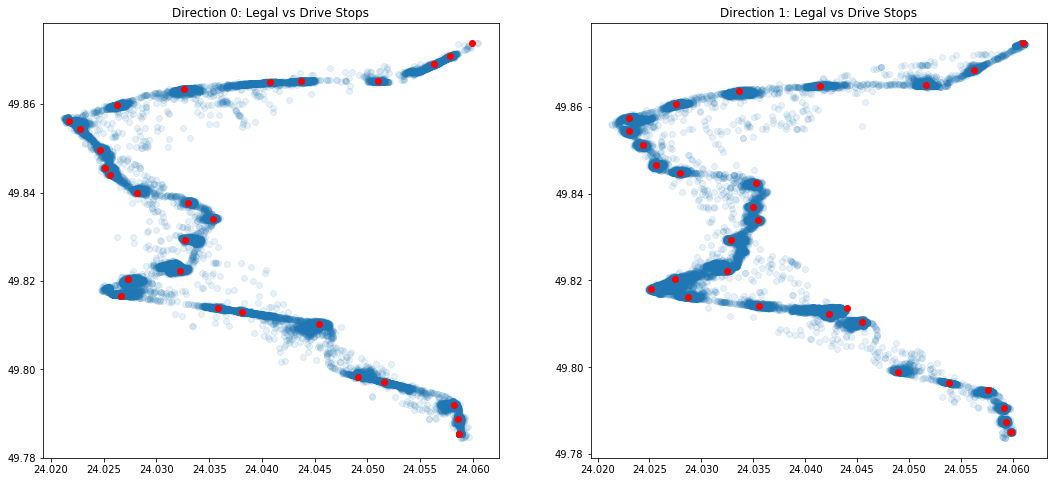

In [112]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
true_stops_coordinates_dir0 = df_1723724_stops[df_1723724_stops['direction']==0]
plt.plot(drive_stops_coordinates_dir0['lon'], drive_stops_coordinates_dir0['lat'], 'o', alpha=0.1)
plt.plot(true_stops_coordinates_dir0['lon'], true_stops_coordinates_dir0['lat'], 'ro')
plt.title('Direction 0: Legal vs Drive Stops')    
    
plt.subplot(1,2,2)
true_stops_coordinates_dir1 = df_1723724_stops[df_1723724_stops['direction']==1]
plt.plot(drive_stops_coordinates_dir1['lon'], drive_stops_coordinates_dir1['lat'], 'o', alpha=0.1)
plt.plot(true_stops_coordinates_dir1['lon'], true_stops_coordinates_dir1['lat'], 'ro')
plt.title('Direction 1: Legal vs Drive Stops')  

plt.show()

Clean and check again:

In [128]:
def find_dist_to_true_stops(df_in, direction):
    
    coeff = 100000
    
    df = df_in.copy()
    df['start_stop_id'] = df['start_stop'].str.extract('id=(\d*)', expand = False).astype(int)
    df['end_stop_id'] = df['end_stop'].str.extract('id=(\d*)', expand = False).astype(int)
    stops = df_1723724_stops[df_1723724_stops['direction']==direction]
    
    stops_start = stops[['stop_id','lat', 'lon']]
    stops_end = stops_start.copy()
    stops_start.columns = ['stop_id','start_lat_true', 'start_lon_true']
    stops_end.columns = ['stop_id','end_lat_true', 'end_lon_true']
    
    df = df.merge(right = stops_start, left_on = 'start_stop_id', right_on = 'stop_id', how = 'left')
    df = df.merge(right = stops_end, left_on = 'end_stop_id', right_on = 'stop_id', how = 'left')
    
    df = df[['drive_index', 'start_stop','start_lat', 'start_lon',
               'end_stop', 'end_lat', 'end_lon', 'start_time', 'end_time', 'time_diff_seconds',
               'start_lat_true','start_lon_true', 'end_lat_true','end_lon_true']]
    
    df['start_dist_to_true'] = np.sqrt((df['start_lat'] - df['start_lat_true'])**2 + 
                                (df['start_lon'] - df['start_lon_true'])**2)
    
    df['end_dist_to_true'] = np.sqrt((df['end_lat'] - df['end_lat_true'])**2 + 
                                (df['end_lon'] - df['end_lon_true'])**2)
    
    return df
    

In [188]:
direction0_df_step9_dirty = find_dist_to_true_stops(direction0_df_step9, 0)
direction1_df_step9_dirty = find_dist_to_true_stops(direction1_df_step9, 1)

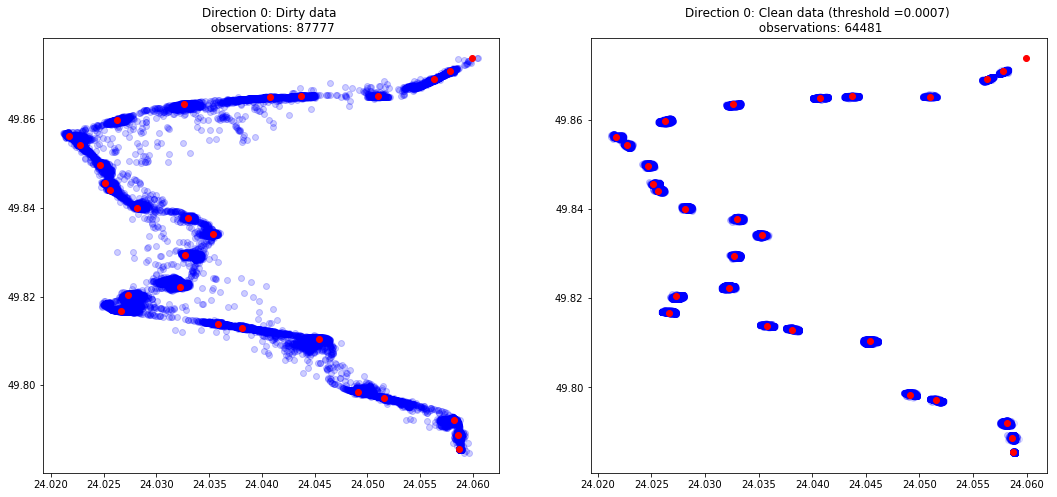

In [189]:
df_dirty = direction0_df_step9_dirty
direction = 0

plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
true_stops_coordinates = df_1723724_stops[df_1723724_stops['direction']==direction]
plt.plot(df_dirty['start_lon'], df_dirty['start_lat'], 'bo', alpha=0.1)
plt.plot(df_dirty['end_lon'], df_dirty['end_lat'], 'bo', alpha=0.1)
plt.plot(true_stops_coordinates['lon'], true_stops_coordinates['lat'], 'ro')
plt.title('Direction 0: Dirty data \n observations: ' + str(len(df_dirty)))    
   
    
plt.subplot(1,2,2)
threshold = 0.0007
clean = df_dirty[df_dirty['start_dist_to_true'] < threshold]
clean = clean[clean['end_dist_to_true'] < threshold]
direction0_df_step9_clean = clean
plt.plot(clean['start_lon'], clean['start_lat'], 'bo', alpha=0.1)
plt.plot(clean['end_lon'], clean['end_lat'], 'bo', alpha=0.1)
plt.plot(true_stops_coordinates['lon'], true_stops_coordinates['lat'], 'ro')
plt.title('Direction 0: Clean data (threshold =' + str(threshold) + ') \n observations: ' + str(len(clean)))

plt.show()

In [203]:
direction0_df_step9_clean['start_stop'].value_counts()

stop #26: id=36317    3157
stop #14: id=36641    3106
stop #11: id=36723    3030
stop #10: id=36742    3028
stop #09: id=36769    2978
stop #13: id=36664    2927
stop #25: id=36323    2924
stop #12: id=36696    2882
stop #03: id=36822    2823
stop #08: id=36780    2744
stop #02: id=37283    2671
stop #07: id=36794    2646
stop #23: id=36348    2612
stop #15: id=36592    2587
stop #24: id=36343    2548
stop #06: id=36812    2448
stop #01: id=36853    2380
stop #04: id=36823    2242
stop #20: id=36437    2231
stop #19: id=36456    2080
stop #22: id=36407    2044
stop #05: id=36821    1942
stop #18: id=36487    1857
stop #21: id=36425    1748
stop #16: id=36558    1448
stop #17: id=36500    1398
Name: start_stop, dtype: int64

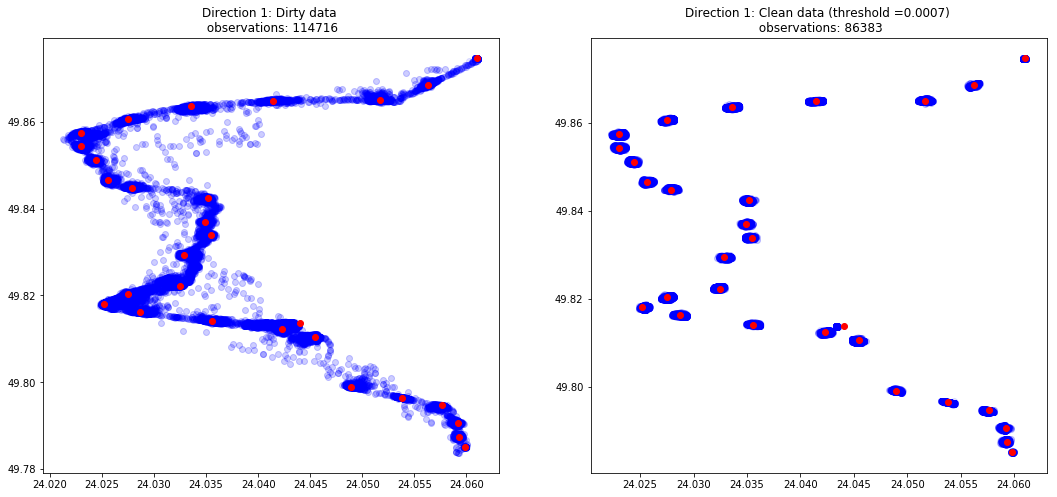

In [200]:
df_dirty = direction1_df_step9_dirty
direction = 1

plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
true_stops_coordinates = df_1723724_stops[df_1723724_stops['direction']==direction]
plt.plot(df_dirty['start_lon'], df_dirty['start_lat'], 'bo', alpha=0.1)
plt.plot(df_dirty['end_lon'], df_dirty['end_lat'], 'bo', alpha=0.1)
plt.plot(true_stops_coordinates['lon'], true_stops_coordinates['lat'], 'ro')
plt.title('Direction 1: Dirty data \n observations: ' + str(len(df_dirty)))    
   
    
plt.subplot(1,2,2)

clean = df_dirty[df_dirty['start_dist_to_true'] < threshold]
clean = clean[clean['end_dist_to_true'] < threshold]
direction1_df_step9_clean = clean
plt.plot(clean['start_lon'], clean['start_lat'], 'bo', alpha=0.1)
plt.plot(clean['end_lon'], clean['end_lat'], 'bo', alpha=0.1)
plt.plot(true_stops_coordinates['lon'], true_stops_coordinates['lat'], 'ro')
plt.title('Direction 1: Clean data (threshold =' + str(threshold) + ') \n observations: ' + str(len(clean)))

plt.show()

In [206]:
direction1_df_step9_clean['start_stop'].value_counts()

stop #00: id=36302    4053
stop #01: id=36310    3996
stop #27: id=36837    3886
stop #19: id=36727    3849
stop #18: id=36711    3845
stop #20: id=36752    3835
stop #02: id=36319    3820
stop #04: id=36339    3818
stop #03: id=36335    3785
stop #16: id=36631    3769
stop #17: id=36685    3719
stop #15: id=36589    3700
stop #26: id=36820    3613
stop #21: id=36770    3461
stop #14: id=36559    3358
stop #05: id=36347    3329
stop #25: id=36819    3236
stop #22: id=36783    3122
stop #09: id=36438    3092
stop #06: id=36408    2838
stop #23: id=36798    2801
stop #24: id=36813    2774
stop #11: id=36471    2318
stop #10: id=56127    2312
stop #13: id=39164    1893
stop #12: id=36484    1725
stop #08: id=36434     230
stop #07: id=36424     206
Name: start_stop, dtype: int64

- Check whether time difference has narrow distribution:

In [191]:
def boxplot_data(df):
    stops = df['start_stop'].unique()
    array = []
    for i in range(len(stops)):
        stop_i = stops[i]
        df_i = df[df['start_stop']==stop_i]
        array_i = df_i['time_diff_seconds'].values
        array.append(array_i)
    return stops, array

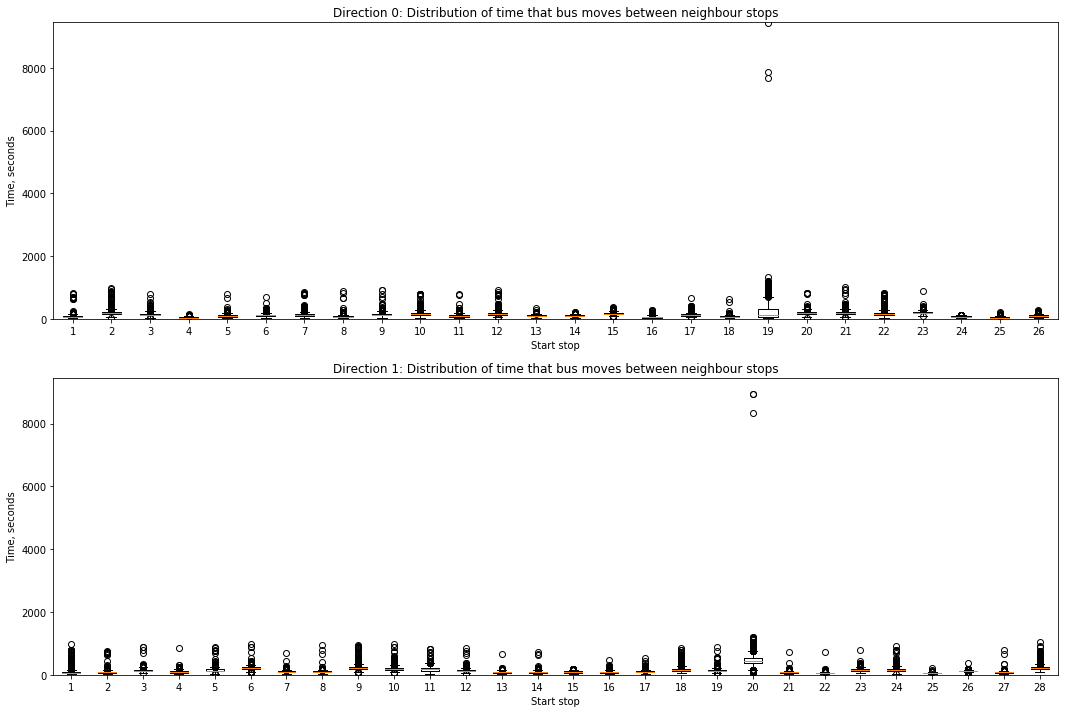

In [192]:
plt.figure(figsize=[18,12])

ymax = np.max([max(direction0_df_step9_clean['time_diff_seconds']),max(direction1_df_step9_clean['time_diff_seconds'])]) +20
plt.subplot(2,1,1)
stops0, array0 = boxplot_data(direction0_df_step9_clean)
plt.boxplot(array0)
plt.title('Direction 0: Distribution of time that bus moves between neighbour stops')
plt.xlabel('Start stop')
plt.ylabel('Time, seconds')
plt.ylim([0,ymax])

plt.subplot(2,1,2)
stops1, array1 = boxplot_data(direction1_df_step9_clean)
plt.boxplot(array1)
plt.title('Direction 1: Distribution of time that bus moves between neighbour stops')
plt.xlabel('Start stop')
plt.ylabel('Time, seconds')
plt.ylim([0,ymax])

plt.show()

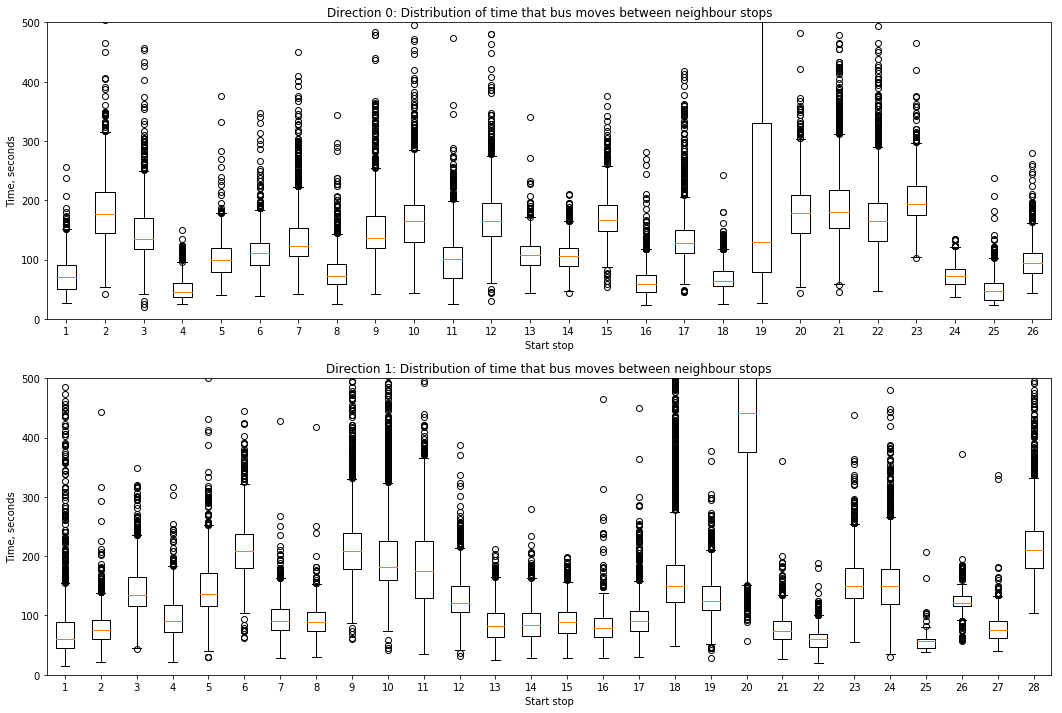

In [193]:
plt.figure(figsize=[18,12])

ymax = 500
plt.subplot(2,1,1)
stops0, array0 = boxplot_data(direction0_df_step9_clean)
plt.boxplot(array0)
plt.title('Direction 0: Distribution of time that bus moves between neighbour stops')
plt.xlabel('Start stop')
plt.ylabel('Time, seconds')
plt.ylim([0,ymax])

plt.subplot(2,1,2)
stops1, array1 = boxplot_data(direction1_df_step9_clean)
plt.boxplot(array1)
plt.title('Direction 1: Distribution of time that bus moves between neighbour stops')
plt.xlabel('Start stop')
plt.ylabel('Time, seconds')
plt.ylim([0,ymax])

plt.show()

#### Step 10. Save data.

In [194]:
print('Direction 0: Final Result')
print(direction0_df_step9_clean.shape)
direction0_df_step9_clean.head()

Direction 0: Final Result
(64481, 16)


,drive_index,start_stop,start_lat,start_lon,end_stop,end_lat,end_lon,start_time,end_time,time_diff_seconds,start_lat_true,start_lon_true,end_lat_true,end_lon_true,start_dist_to_true,end_dist_to_true
1,8,stop #01: id=36853,49.870942,24.058075,stop #02: id=37283,49.869133,24.056483,2017-07-20 06:29:53.937044000,2017-07-20 06:30:24.701013000,30.763969,49.870820,24.05782,49.869136,24.05634,0.000283,0.000143
2,8,stop #02: id=37283,49.869133,24.056483,stop #03: id=36822,49.865100,24.051133,2017-07-20 06:30:24.701013000,2017-07-20 06:33:40.596908000,195.895895,49.869136,24.05634,49.865130,24.05098,0.000143,0.000156
3,8,stop #03: id=36822,49.865100,24.051133,stop #04: id=36823,49.865125,24.043279,2017-07-20 06:33:40.596908000,2017-07-20 06:35:18.226233500,97.629326,49.865130,24.05098,49.865270,24.04367,0.000156,0.000417
4,8,stop #04: id=36823,49.865125,24.043279,stop #05: id=36821,49.864908,24.040854,2017-07-20 06:35:18.226233500,2017-07-20 06:35:49.375084000,31.148851,49.865270,24.04367,49.864930,24.04077,0.000417,0.000087
5,8,stop #05: id=36821,49.864908,24.040854,stop #06: id=36812,49.863383,24.032600,2017-07-20 06:35:49.375084000,2017-07-20 06:38:28.338238000,158.963154,49.864930,24.04077,49.863450,24.03264,0.000087,0.000078


In [195]:
print('Direction 1: Final Result')
print(direction1_df_step9_clean.shape)
direction1_df_step9_clean.head()

Direction 1: Final Result
(86383, 16)


,drive_index,start_stop,start_lat,start_lon,end_stop,end_lat,end_lon,start_time,end_time,time_diff_seconds,start_lat_true,start_lon_true,end_lat_true,end_lon_true,start_dist_to_true,end_dist_to_true
0,115,stop #00: id=36302,49.785100,24.059850,stop #01: id=36310,49.787550,24.059200,2017-07-21 05:23:15.504501000,2017-07-21 05:25:03.217001000,107.712500,49.78509,24.05984,49.78746,24.05931,0.000014,0.000142
1,115,stop #01: id=36310,49.787550,24.059200,stop #02: id=36319,49.790575,24.059113,2017-07-21 05:25:03.217001000,2017-07-21 05:26:47.472687250,104.255686,49.78746,24.05931,49.79058,24.05920,0.000142,0.000088
2,115,stop #02: id=36319,49.790575,24.059113,stop #03: id=36335,49.794621,24.057337,2017-07-21 05:26:47.472687250,2017-07-21 05:28:48.491164750,121.018478,49.79058,24.05920,49.79466,24.05762,0.000088,0.000285
3,115,stop #03: id=36335,49.794621,24.057337,stop #04: id=36339,49.796317,24.054033,2017-07-21 05:28:48.491164750,2017-07-21 05:30:02.873079000,74.381914,49.79466,24.05762,49.79647,24.05384,0.000285,0.000247
4,115,stop #04: id=36339,49.796317,24.054033,stop #05: id=36347,49.798913,24.048875,2017-07-21 05:30:02.873079000,2017-07-21 05:32:44.954979250,162.081900,49.79647,24.05384,49.79897,24.04892,0.000247,0.000073


In [201]:
direction0_df_step9_dirty.to_csv('output/direction0_df_dirty.csv', index = False)
direction1_df_step9_dirty.to_csv('output/direction1_df_dirty.csv', index = False)

In [202]:
direction0_df_step9_clean.to_csv('output/direction0_df_clean.csv', index = False)
direction1_df_step9_clean.to_csv('output/direction1_df_clean.csv', index = False)